In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [5]:
df=pd.read_csv('titanic_toy.csv')

In [6]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
x,y

(      Age     Fare  Family
 0    22.0   7.2500       1
 1    38.0  71.2833       1
 2    26.0   7.9250       0
 3    35.0  53.1000       1
 4    35.0   8.0500       0
 ..    ...      ...     ...
 886  27.0  13.0000       0
 887  19.0  30.0000       0
 888   NaN  23.4500       3
 889  26.0      NaN       0
 890  32.0   7.7500       0
 
 [891 rows x 3 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
df.columns

Index(['Age', 'Fare', 'Family', 'Survived'], dtype='object')

In [20]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].mean()
mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].mean()

In [21]:
x_train['Age_mean']=x_train['Age'].fillna(mean_age)
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['fare_mean']=x_train['Fare'].fillna(mean_fare)
x_train['fare_median']=x_train['Fare'].fillna(median_fare)

In [22]:
print(f" Original age variance = {x_train['Age'].var()} ")
print(f" Age Variance after mean imputation = {x_train['Age_mean'].var()} ")
print(f" Age Variance after median imputation = {x_train['Age_median'].var()} ")
print(f" Original fare variance = {x_train['Fare'].var()} ")
print(f" fare Variance after mean imputation = {x_train['fare_mean'].var()} ")
print(f" fare Variance after median imputation= {x_train['fare_median'].var()} ")

 Original age variance = 204.3495133904614 
 Age Variance after mean imputation = 161.81262452718673 
 Age Variance after median imputation = 161.81262452718673 
 Original fare variance = 2448.197913706318 
 fare Variance after mean imputation = 2324.2385256705547 
 fare Variance after median imputation= 2324.2385256705547 


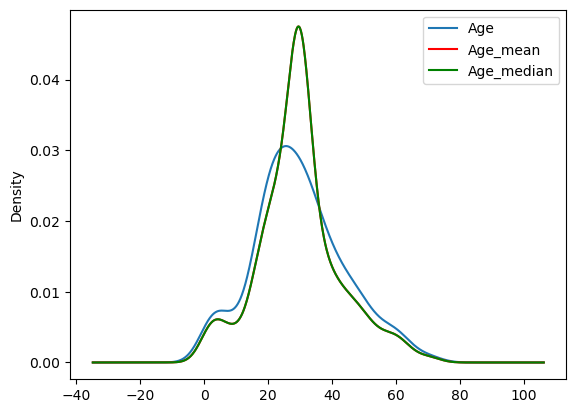

In [30]:
fig=plt.figure()
ax=fig.add_subplot()
# original age varience
x_train['Age'].plot(kind="kde",ax=ax)
# age mean varience after impution
x_train['Age_mean'].plot(kind="kde",ax=ax,color='red')
# age median varience after impution
x_train['Age_median'].plot(kind="kde",ax=ax,color='green')
# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

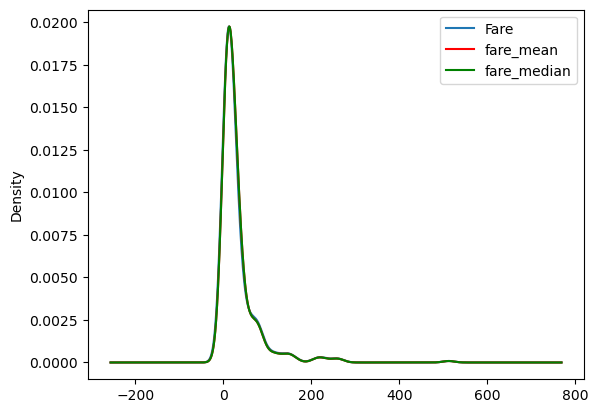

In [31]:
fig=plt.figure()
ax=fig.add_subplot()
# original age varience
x_train['Fare'].plot(kind="kde",ax=ax)
# age mean varience after impution
x_train['fare_mean'].plot(kind="kde",ax=ax,color='red')
# age median varience after impution
x_train['fare_median'].plot(kind="kde",ax=ax,color='green')
# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [32]:
x_train.cov()

,Age,Fare,Family,Age_mean,Age_median,fare_mean,fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,66.665205
Fare,70.719262,2448.197914,17.258917,55.603719,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.146106,16.385048,16.385048
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,52.788341
Age_median,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,52.788341
fare_mean,66.665205,2448.197914,16.385048,52.788341,52.788341,2324.238526,2324.238526
fare_median,66.665205,2448.197914,16.385048,52.788341,52.788341,2324.238526,2324.238526


In [34]:
x_train.corr()

,Age,Fare,Family,Age_mean,Age_median,fare_mean,fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.090156
Fare,0.092644,1.000000,0.208268,0.088069,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.244610,0.205499,0.205499
Age_mean,1.000000,0.088069,-0.244610,1.000000,1.000000,0.086078,0.086078
Age_median,1.000000,0.088069,-0.244610,1.000000,1.000000,0.086078,0.086078
fare_mean,0.090156,1.000000,0.205499,0.086078,0.086078,1.000000,1.000000
fare_median,0.090156,1.000000,0.205499,0.086078,0.086078,1.000000,1.000000


<Axes: >

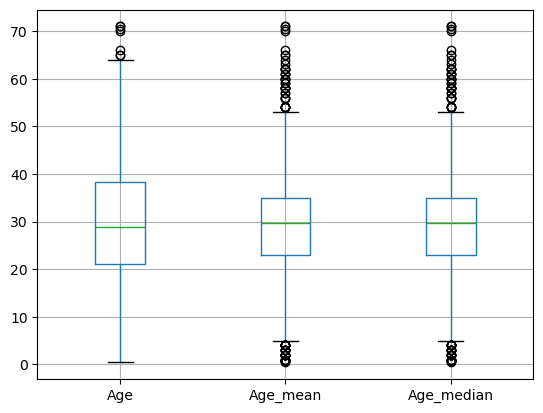

In [35]:
x_train[["Age",'Age_mean','Age_median']].boxplot()

<Axes: >

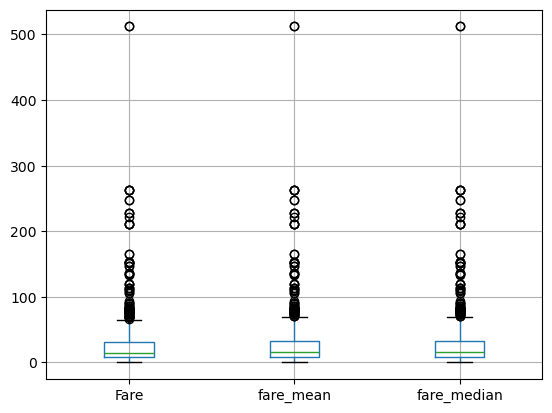

In [37]:
x_train[["Fare",'fare_mean','fare_median']].boxplot()

# now simpleimpute using sklearn

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [40]:
trf=ColumnTransformer([
    ('impute1',SimpleImputer(strategy='median'),['Age']),
    ('impute2',SimpleImputer(strategy='mean'),['Fare'])
],remainder='passthrough')

In [42]:
x_train=trf.fit_transform(x_train)
x_test=trf.transform(x_test)

In [45]:
trf.named_transformers_['impute1'].statistics_

array([28.75])

In [46]:
trf.named_transformers_['impute2'].statistics_

array([32.61759689])